In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

In [3]:
nobel_df = pd.read_csv('nobel prize.csv')
nobel_df.head()


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France


In [5]:
country = nobel_df['Birth Country'].value_counts()
females = []
countries = []

for i in country.index:
    x = nobel_df[(nobel_df['Birth Country']==i) & (nobel_df['Sex'] == 'Female')]['Full Name']
    females.append(len(x.unique()))
    countries.append(i)
    
female_counts = pd.DataFrame({
    "Country": countries,
    "Number of Female Winners": females
})

new_df = female_counts[female_counts["Number of Female Winners"] != 0]
new_df

,Country,Number of Female Winners
0,United States of America,11
2,Germany,2
3,France,2
4,Sweden,2
8,Canada,1
9,Italy,2
11,Austria,1
12,Norway,1
13,China,1
14,Denmark,1


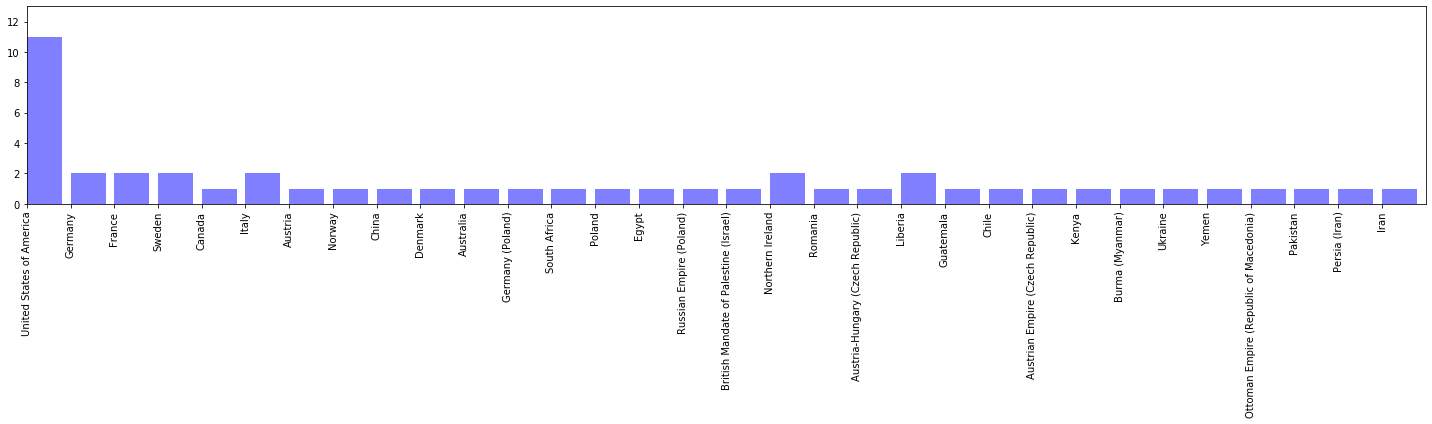

In [22]:
c = new_df["Country"]
num = new_df["Number of Female Winners"]

plt.figure(figsize=(20,6))
plt.bar(c, num, color='b', alpha=0.5, align="edge")
tick_locations = [value for value in c]
plt.xticks(tick_locations, c, rotation = "vertical")
plt.ylim(0, 13)
plt.xlim(0,32)
plt.tight_layout()
plt.savefig("femalewinners",dpi=300,bbox_inches='tight')